# Q1 Sobel

## a)

In [3]:
# generate random matrix with size n*n
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d
def generateRandomMatrix(n):
    return np.random.randint(0,256,size=(n,n))

In [4]:
# write convolution function
def convolve(matrix, kernel):
    m, n = kernel.shape
    padwidth= kernel.shape[0]//2
    padded_matrix = np.pad(matrix, padwidth, mode='constant')
    x, y = padded_matrix.shape
    output = np.zeros(matrix.shape)
    for i in range(padwidth,x-padwidth):
        for j in range(padwidth,y-padwidth):
            output[i-padwidth, j-padwidth] = np.sum(padded_matrix[i-padwidth:i+padwidth+1, j-padwidth:j+padwidth+1] * kernel)
    return output

In [5]:
# generate horizontal and vertical kernels
def generateSobelKernels():
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])
    return sobel_x, sobel_y

In [6]:
# convolve the initial matrix with kernels
image = generateRandomMatrix(10)
sobel_x, sobel_y = generateSobelKernels()
grad_x = convolve(image, sobel_x)
grad_y = convolve(image, sobel_y)

In [ ]:
# generate magnitude and direction matrixes
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_dir = np.arctan2(grad_y, grad_x)
print("Original matrix:")
print(image)
print("Horizontal gradient:")
print(grad_x)
print("Vertical gradient:")
print(grad_y)
print("Gradient magnitude:")
print(grad_mag)
print("Gradient direction:")
print(grad_dir)

Original matrix:
[[ 82  31 140  98 104 206 215 251 237 171]
 [164   7 124  74 107  60  51  72 146  73]
 [230 163  88 209  92 125 172   9  84   5]
 [ 27 178 244   8  80 204 186   8 144  23]
 [ 88 108 146  61 155 247 105 107 154 213]
 [ 86 247  67 135 127 156 100 191  41  76]
 [135   6 188   3  42 172 139 149 124 140]
 [ 53   0 128  36 209  61 105 128 120  69]
 [114 131 235 213  71 119 245 180 138  95]
 [207 128 159 118 166  16  78 156 147 212]]
Horizontal gradient:
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   69   76  201  -89  202  166  102  139 -159 -620    0]
 [   0  208 -164  247  -66   -4   79  -47  124  -82 -613    0]
 [   0  511 -107  -11 -173   14  210 -416 -123    8 -458    0]
 [   0  627  350 -341 -315  494  242 -648 -123  132 -526    0]
 [   0  641  314 -376  -86  589  -21 -441   -3  112 -493    0]
 [   0  608   73 -274  -17  397   -7  -93  -84 -133 -360    0]
 [   0  259  162  -82 -151  384   63   56  -74 -192 -409    0]
 [   0  137  324  151 -148 

## b)

In [7]:
# load image and convert it to gray scale
# img = Image.open('afshin.jpg').convert('L')
# img_arr = np.array(img)
image= cv2.imread('afshin.jpg',0)


In [20]:
# define gaussian kernel
def Gaussian_Blurring(n):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((n,n))
    ksize = n
    sigma = 1.0
    for i in range(ksize):
        for j in range(ksize):
            kernel[i][j] = np.exp(-((i-2)**2 + (j-2)**2)/(2*sigma**2)) / (2*np.pi*sigma**2)
    kernel = kernel / np.sum(kernel)
    
    return kernel
# kernel = np.array([[1, 2, 1],
#                    [2, 4, 2],
#                    [1, 2, 1]], dtype=np.float64) / 16
kernel = Gaussian_Blurring(25)

<function matplotlib.pyplot.show(close=None, block=None)>

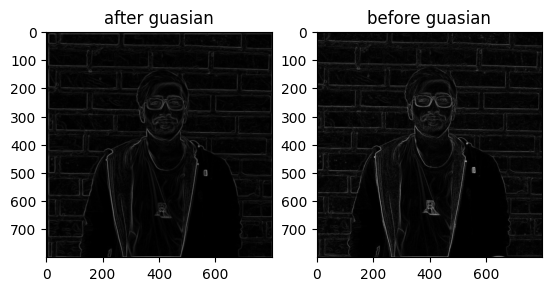

In [22]:
# generate Sobel outputs for 2 cases with gaussion filter and without gaussion filter and compare them
# apply 3x3 Gaussian filter

blur = np.zeros_like(image, dtype=np.float32)
blur=convolve(image,kernel)

sobelx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobely = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])
# apply Sobel operator
sobelx_out = np.zeros(image.shape)
sobely_out = np.zeros(image.shape)

sobelx_outB = convolve(image,sobel_x)
sobely_outB = convolve(image,sobel_y)

magB = np.sqrt(sobelx_outB**2 + sobely_outB**2)
angleB = np.arctan2(sobely_outB, sobelx_outB)

sobelx_out = convolve(blur,sobel_x)
sobely_out = convolve(blur,sobel_y)

mag = np.sqrt(sobelx_out**2 + sobely_out**2)
angle = np.arctan2(sobely_out, sobelx_out)


# print("Original Image:")
# img.show()

# print("Filtered Image (3x3 Gaussian Kernel):")
# Image.fromarray(blur.astype(np.uint8)).show()



# print("Sobel Operator Output - Horizontal Edge Detection:")
# Image.fromarray(sobelx_out.astype(np.uint8)).show()

# print("Sobel Operator Output - Vertical Edge Detection:")
# Image.fromarray(sobely_out.asty
plt.subplot(121)
plt.imshow(mag,cmap='gray')
# Image.fromarray(mag.astype(np.uint8)).show()
plt.title('after guasian')
plt.subplot(122)
plt.imshow(magB,cmap='gray')
plt.title('before guasian')
plt.show
# Image.fromarray(angle.astype(np.uint8)).show()

## c)

In [ ]:
# do the operations in part b with OpenCV Sobel method and describe its parameters

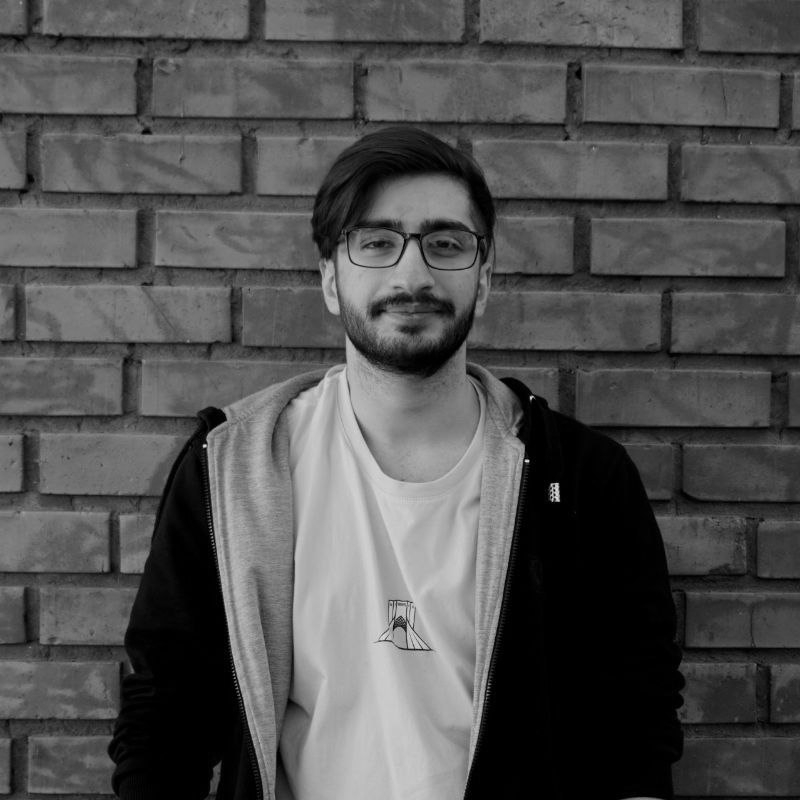

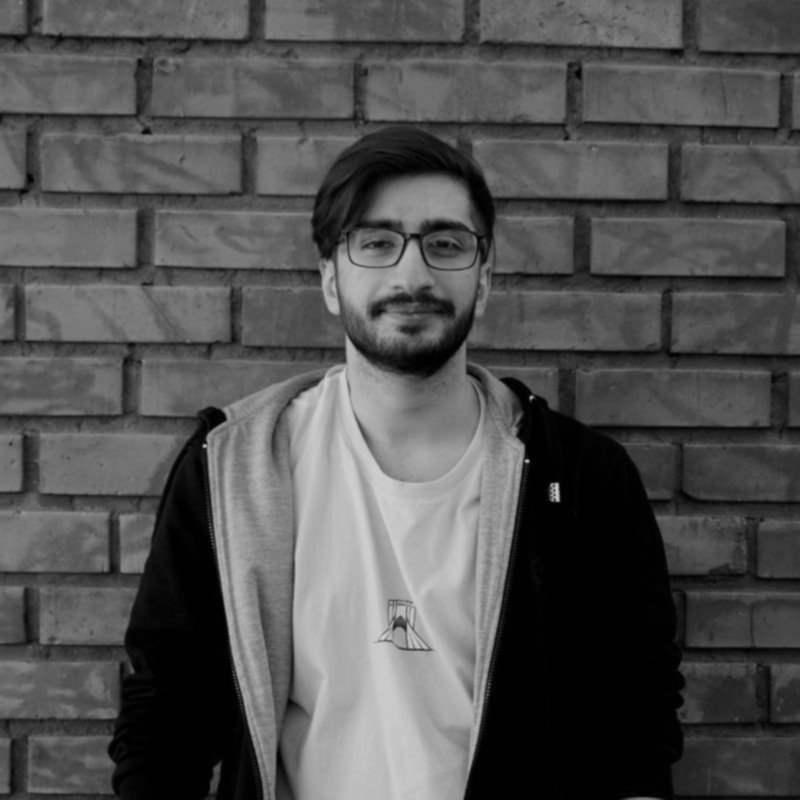

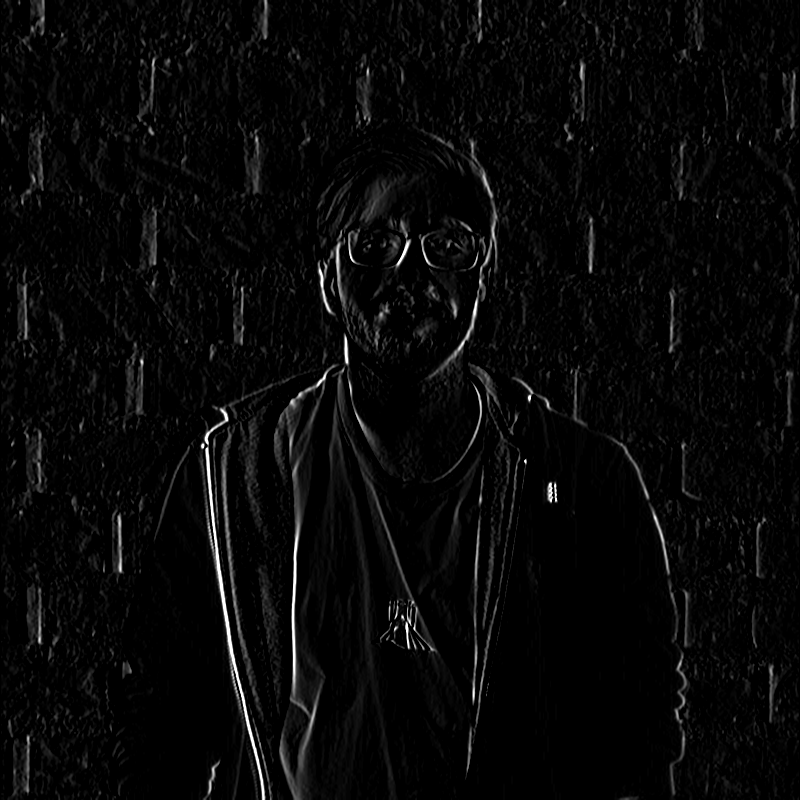

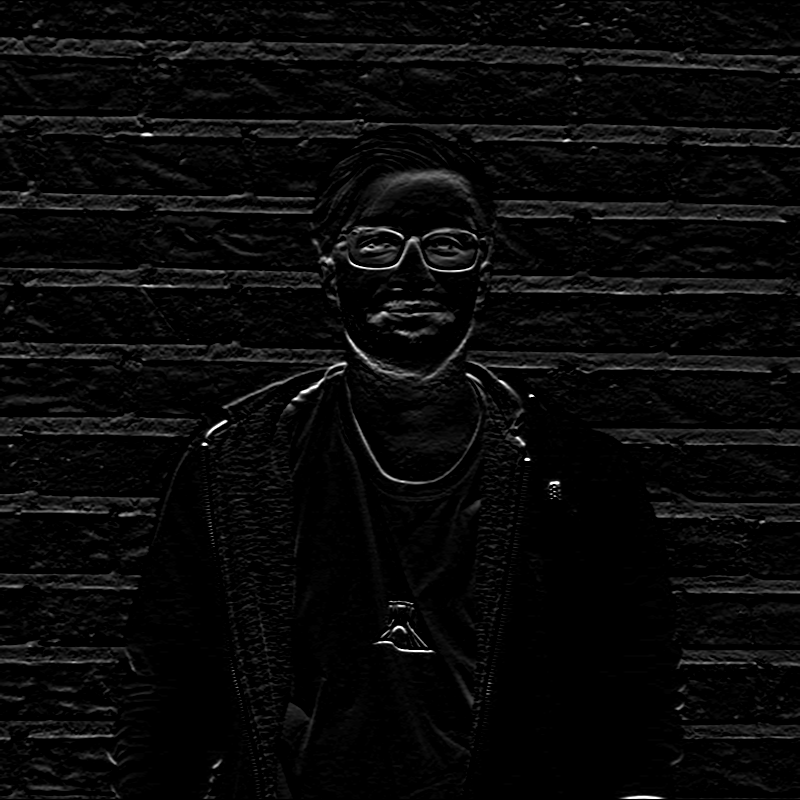

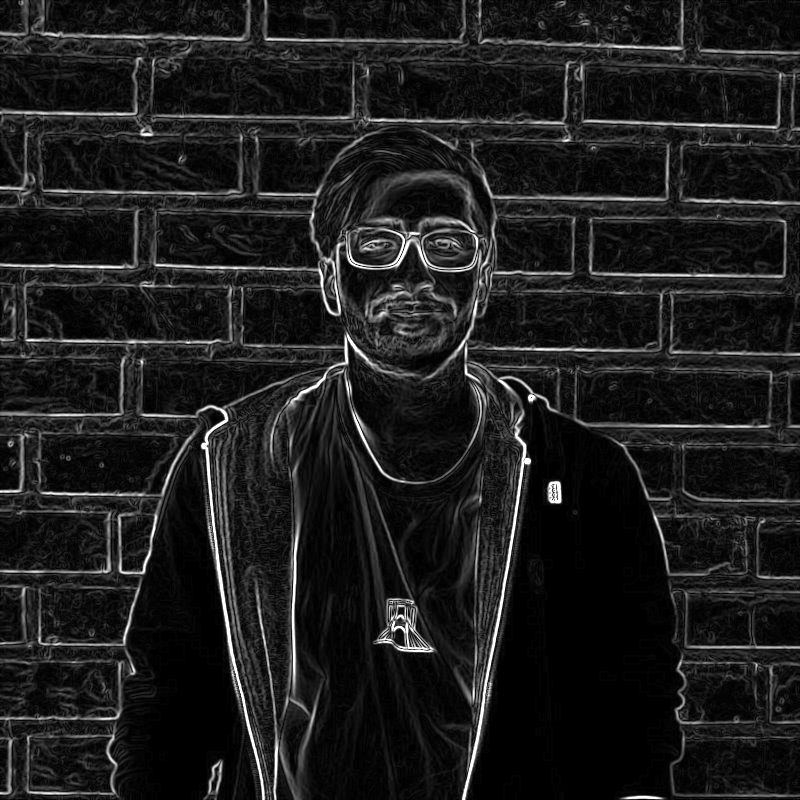

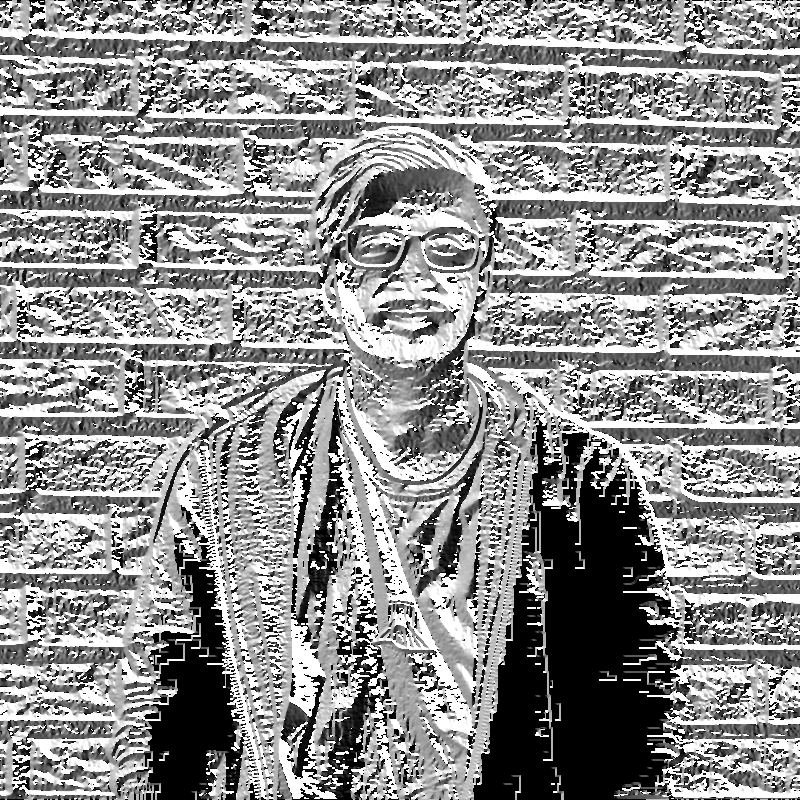

In [ ]:
# read the image
from google.colab.patches import cv2_imshow
img2 = cv2.imread('afshin.jpg', cv2.IMREAD_GRAYSCALE)

# apply 3x3 Gaussian filter
blur2 = cv2.GaussianBlur(img2, (3, 3), 0)

# apply Sobel operator
sobelx2 = cv2.Sobel(blur2, cv2.CV_64F, 1, 0, ksize=3)
sobely2 = cv2.Sobel(blur2, cv2.CV_64F, 0, 1, ksize=3)

# calculate magnitude and direction matrices
mag2, angle2 = cv2.cartToPolar(sobelx2, sobely2, angleInDegrees=True)


cv2_imshow(img2)
cv2_imshow(blur2)
cv2_imshow(sobelx2)
cv2_imshow(sobely2)
cv2_imshow(mag2)
cv2_imshow(angle2)

# wait for key press and then close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()